In [2]:
from google.colab import files
uploaded = files.upload()

Saving vehicles.csv to vehicles.csv


In [3]:
import pandas as pd
df = pd.read_csv('vehicles.csv')
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [4]:
def get_dom(dt):
  return dt.day
def get_weekday(dt):
  return dt.weekday()
def get_hour(dt):
  return dt.hour
def get_year(dt):
  return dt.year
def get_month(dt):
  return dt.month
def get_dayofyear(dt):
  return dt.dayofyear
def get_weekofyear(dt):
  return dt.weekofyear
df['DateTime']=df['DateTime'].map(pd.to_datetime)
df['date'] = df['DateTime'].map(get_dom)
df['weekday'] = df['DateTime'].map(get_weekday)
df['hour'] = df['DateTime'].map(get_hour)
df['month'] = df['DateTime'].map(get_month)
df['year'] = df['DateTime'].map(get_year)
df['dayofyear'] = df['DateTime'].map(get_dayofyear)
df['weekofyear'] = df['DateTime'].map(get_weekofyear)
df.head()

,DateTime,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear
0,2015-11-01 00:00:00,15,1,6,0,11,2015,305,44
1,2015-11-01 01:00:00,13,1,6,1,11,2015,305,44
2,2015-11-01 02:00:00,10,1,6,2,11,2015,305,44
3,2015-11-01 03:00:00,7,1,6,3,11,2015,305,44
4,2015-11-01 04:00:00,9,1,6,4,11,2015,305,44


In [5]:
df=df.drop(['DateTime'],axis=1)
df1=df.drop(['Vehicles'],axis=1)
target=df['Vehicles']
print(df1.head())
target.head()

   date  weekday  hour  month  year  dayofyear  weekofyear
0     1        6     0     11  2015        305          44
1     1        6     1     11  2015        305          44
2     1        6     2     11  2015        305          44
3     1        6     3     11  2015        305          44
4     1        6     4     11  2015        305          44


,Vehicles
0,15
1,13
2,10
3,7
4,9


In [6]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(df1,target)
model.predict([[11,6,0,1,2015,11,2]])

array([9.61671429])

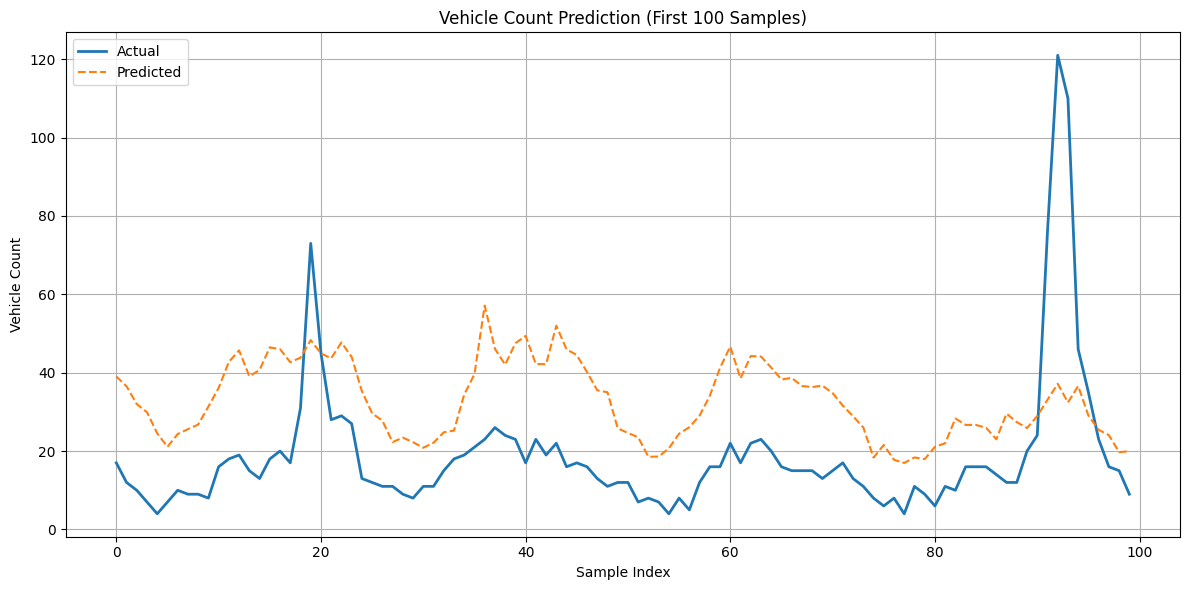

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Only drop 'DateTime' if it exists
if 'DateTime' in df.columns:
    df = df.drop(['DateTime'], axis=1)

# ✅ Define target and features
target = df['Vehicles']
df1 = df.drop(['Vehicles'], axis=1)

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.2, shuffle=False)

# ✅ Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Predict
y_pred = model.predict(X_test)

# ✅ Reset index for proper plotting
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred, name='Predicted').reset_index(drop=True)

# ✅ Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linestyle='--')
plt.title('Vehicle Count Prediction (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.tight_layout()

# ✅ Save plot image
plt.savefig("vehicle_prediction_plot.png", dpi=300)
plt.show()
